<a href="https://colab.research.google.com/github/kanakrai331-sketch/PRODIGY_ML_02/blob/main/Task_02_Customer__Segmentation_Using_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [10]:
data = pd.read_csv('Mall_Customers.csv')

In [11]:
import pandas as pd

# Create a dummy DataFrame with similar structure to Mall_Customers.csv
dummy_data = {
    'CustomerID': range(1, 11),
    'Gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [19, 21, 20, 23, 31, 22, 35, 23, 64, 30],
    'Annual Income (k$)': [15, 15, 16, 16, 17, 17, 18, 18, 19, 19],
    'Spending Score (1-100)': [39, 81, 6, 77, 40, 76, 6, 94, 3, 72]
}
dummy_df = pd.DataFrame(dummy_data)

# Save the dummy DataFrame to a CSV file in the Colab content directory
dummy_df.to_csv('Mall_Customers.csv', index=False)
print("Dummy 'Mall_Customers.csv' created in /content/")

Dummy 'Mall_Customers.csv' created in /content/


In [ ]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
non_numeric_columns = data.select_dtypes(exclude=[np.number]).columns

In [ ]:
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())


In [ ]:
label_encoder = LabelEncoder()
for column in non_numeric_columns:
    data[column] = label_encoder.fit_transform(data[column].astype(str))


In [8]:
data = pd.read_csv('Mall_Customers.csv')
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optimal number of clusters using Elbow method
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

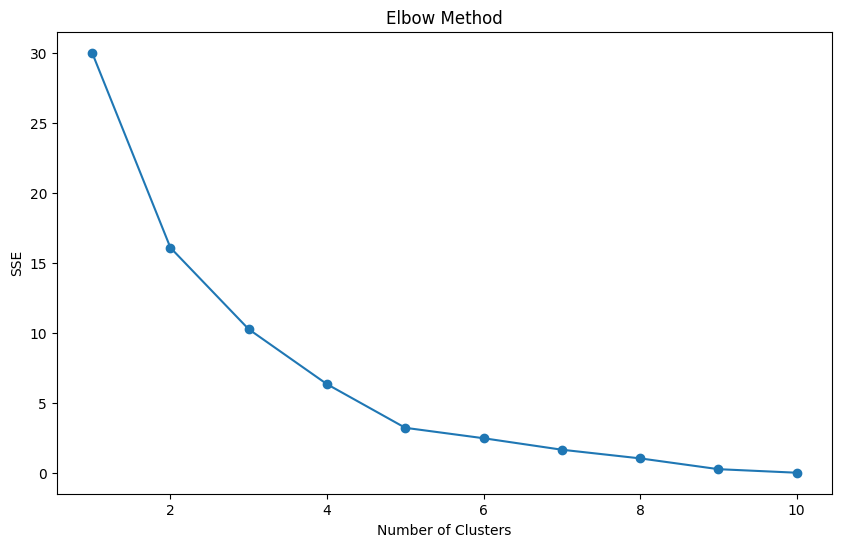

In [9]:

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [ ]:
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))


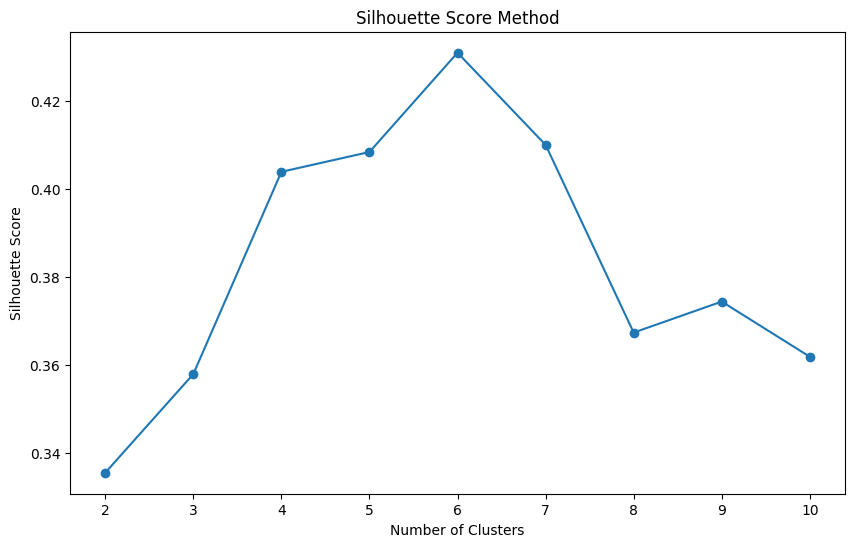

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Method')
plt.show()

In [ ]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

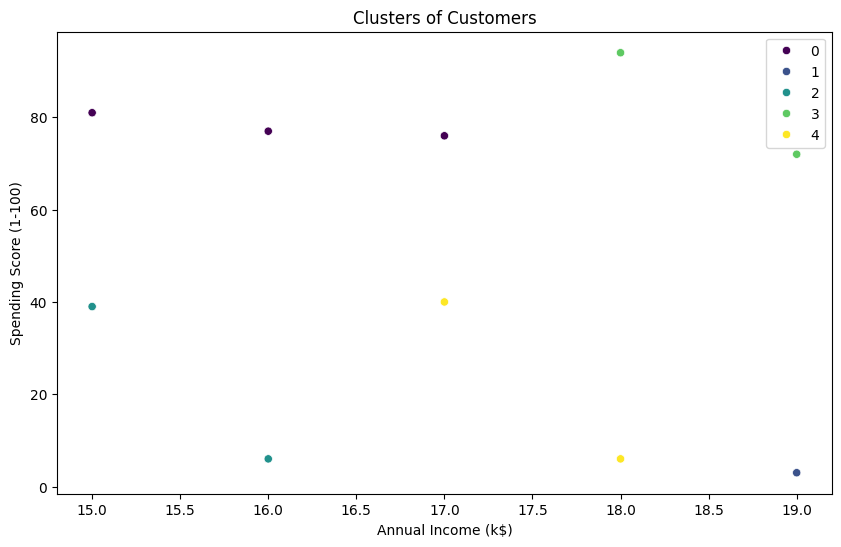

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [ ]:
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers, columns=features)
cluster_centers_df['Cluster'] = range(optimal_k)

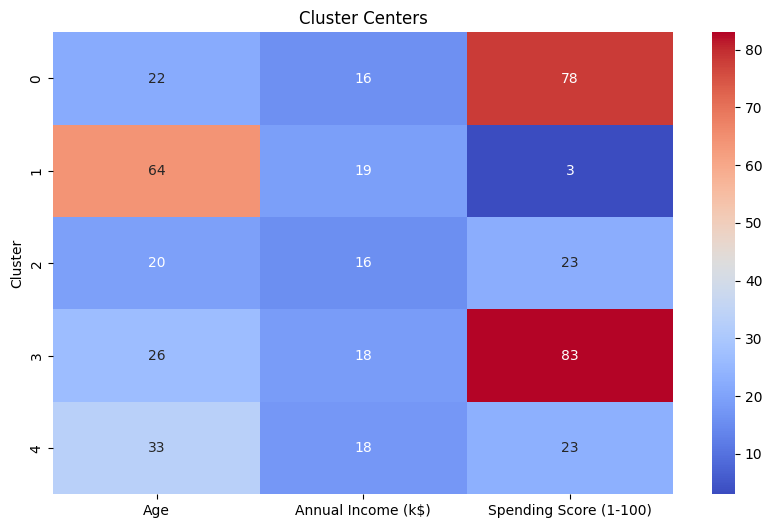

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_centers_df.set_index('Cluster'), annot=True, cmap='coolwarm')
plt.title('Cluster Centers')
plt.show()

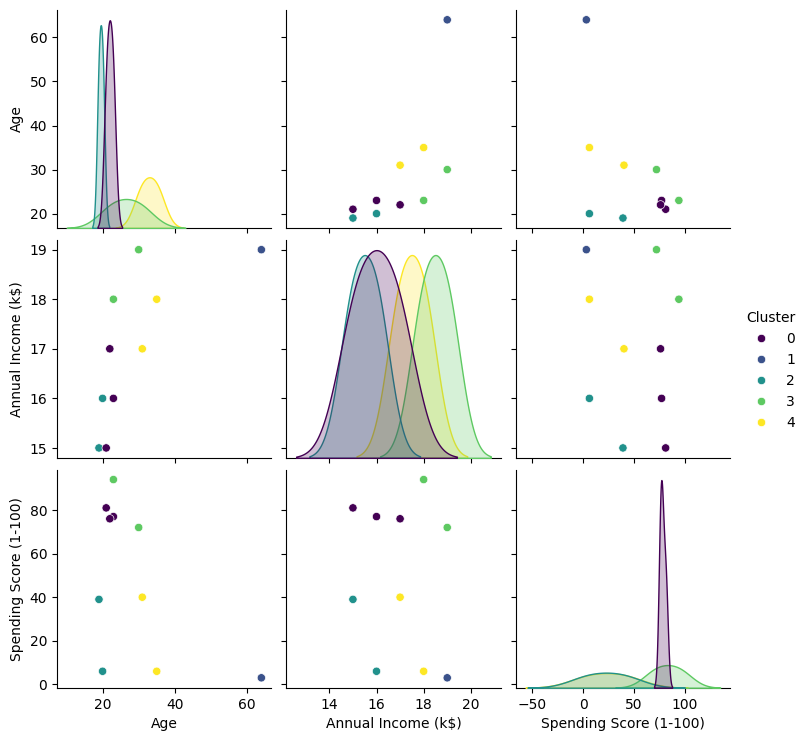

In [ ]:
sns.pairplot(data, hue='Cluster', palette='viridis', vars=features)
plt.show()

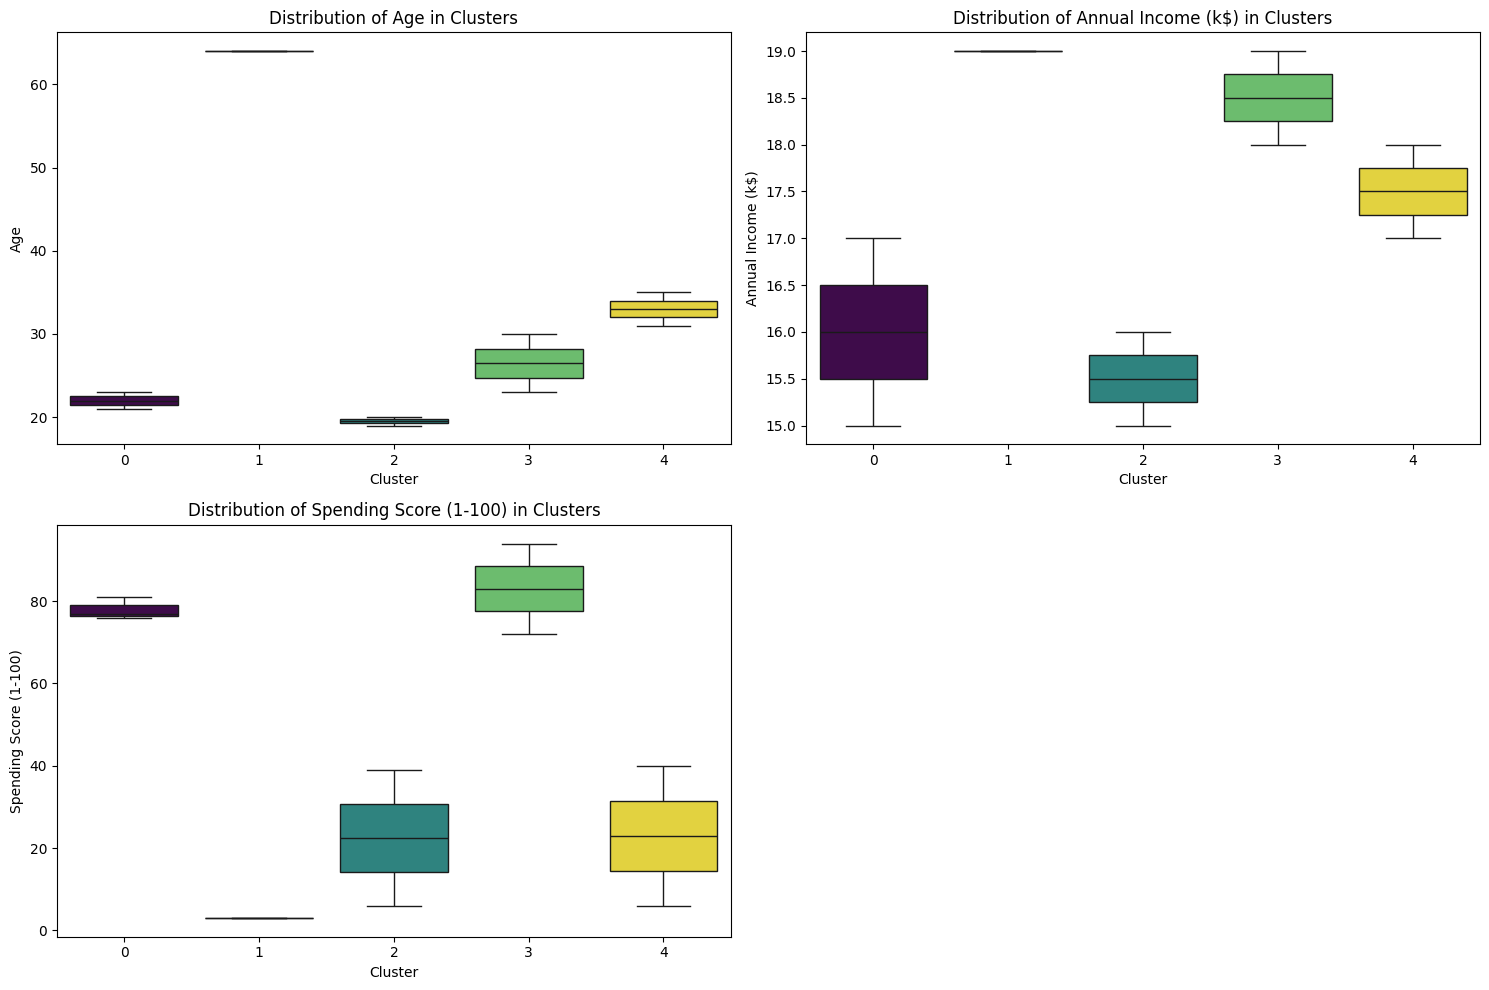

In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='Cluster', y=feature, data=data, palette='viridis', hue='Cluster', legend=False)
    plt.title(f'Distribution of {feature} in Clusters')
plt.tight_layout()
plt.show()

In [14]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = data.groupby('Cluster')[features].mean().reset_index()
print(cluster_summary)

# Save the clustered data
data.to_csv('clustered_customers.csv', index=False)

   Cluster   Age  Annual Income (k$)  Spending Score (1-100)
0        0  22.0                16.0                    78.0
1        1  64.0                19.0                     3.0
2        2  19.5                15.5                    22.5
3        3  26.5                18.5                    83.0
4        4  33.0                17.5                    23.0
